In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [58]:
dataset = pd.read_csv('hotel_booking.csv')

In [59]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [18]:
#checking datatypes 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [60]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [61]:
# Remove columns representing personal data 
dataset = dataset.drop(["name", "email","phone-number","credit_card"], axis=1)

In [62]:
dataset.shape

(119390, 32)

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [64]:
#changing column type to datetime format
dataset['reservation_status_date']=pd.to_datetime(dataset['reservation_status_date'])

In [65]:
dataset.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [20]:
# to see  category objects different categories 
for col in dataset.describe(include='object').columns:
    print (col)
    print(dataset[col].unique())
    print('_ '*30)

hotel
['Resort Hotel' 'City Hotel']
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'C

In [25]:
#checking missing values
dataset.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [66]:
#removing column where maximum values is null or column is not required
dataset.drop(['agent'],axis = 1,inplace = True)

In [67]:
dataset.drop(['company'],axis = 1,inplace = True)

In [68]:
#statiscal summary of numeric values
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN


*mean babies =0 is not correct can be ignored .Also mean ADR as negative value(-6) is also not correct  so it means there are outlier in ADR*

*check outlier in adr using box plot and then removing it*

<Axes: >

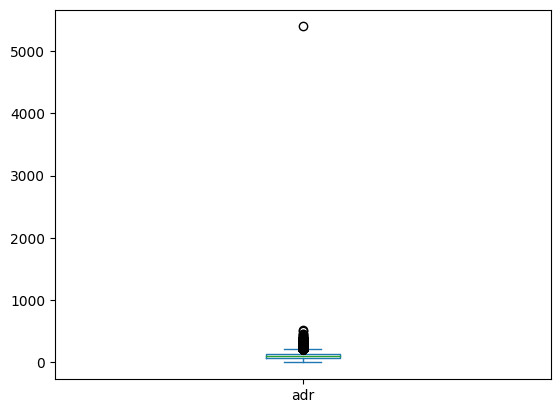

In [30]:
dataset['adr'].plot(kind='box')

In [69]:
dataset=dataset[dataset['adr']<5000]

In [70]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,2.321169,101.786744,0.062518,0.571368,2016-07-30 00:26:45.132801280
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.560000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.175768,0.844340,1.497443,0.652304,17.594793,48.153554,0.245292,0.792800,NaN


# DATA ANALYSIS and VISUALISATION

*to find % of cancelled bookings to understand if it is really a problem*

is_canceled
0    0.629589
1    0.370411
Name: proportion, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

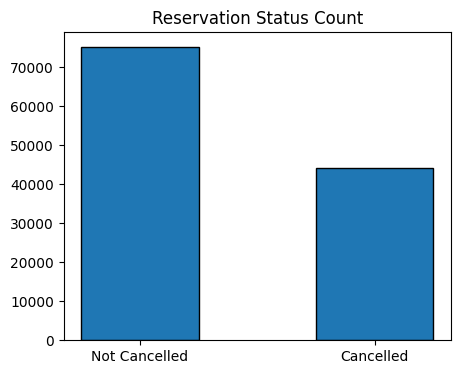

In [71]:
cancelled_pct=dataset['is_canceled'].value_counts(normalize=True)
print(cancelled_pct)

plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled','Cancelled'],dataset['is_canceled'].value_counts(),edgecolor='k',width=0.5)
plt.show


*From the above graph we can see that the percentage of Cancelled Reservations (37%) is significantly large impacting hotel earnings*

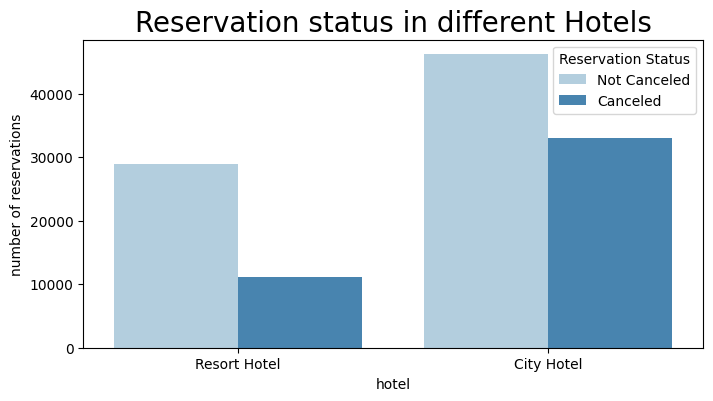

In [72]:
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=dataset, palette='Blues')

# Adding legend directly to the Seaborn plot
ax1.legend(title='Reservation Status', labels=['Not Canceled', 'Canceled'])

plt.title('Reservation status in different Hotels', size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.show()


*From the graph we can note that as Resort Hotel have less reservations may be because the resort hotel are expensive*

*Also to note City hotel having more bookings also have high cancellation rate*

In [73]:
#checking the percentage of cancelled  for resort hotel
resort_hotel_data=dataset[dataset['hotel']=='Resort Hotel']
resort_hotel_data['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [74]:
#checking the percentage of cancelled  for city hotel
city_hotel_data=dataset[dataset['hotel']=='City Hotel']
city_hotel_data['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582738
1    0.417262
Name: proportion, dtype: float64

*From the above figures we can note for Resort Hotel ~28% booking were canceled while for City Hotel ~42% bookings were canceled*

*We will group the data by reseravtion status date with avg ADR for that date and try to visualise it*

In [75]:
#grouping hotel data by reservation status date
resort_hotel=resort_hotel_data.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel_data.groupby('reservation_status_date')[['adr']].mean()


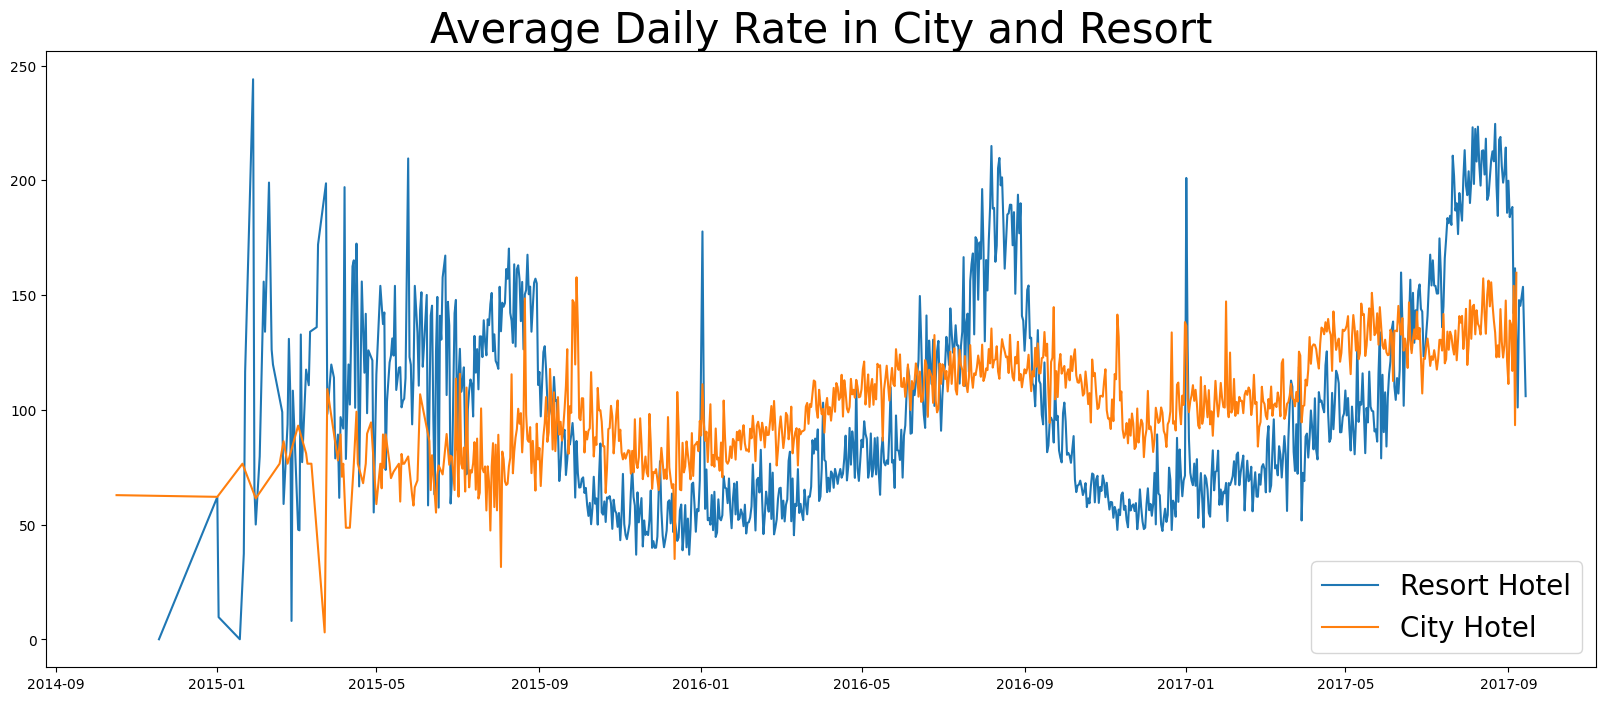

In [76]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort',fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label = 'City Hotel ')
plt.legend(fontsize=20)
plt.show()

*From the graph it is observed that ADR for Resort Hotel is comparitively more than City Hotel for certain days*

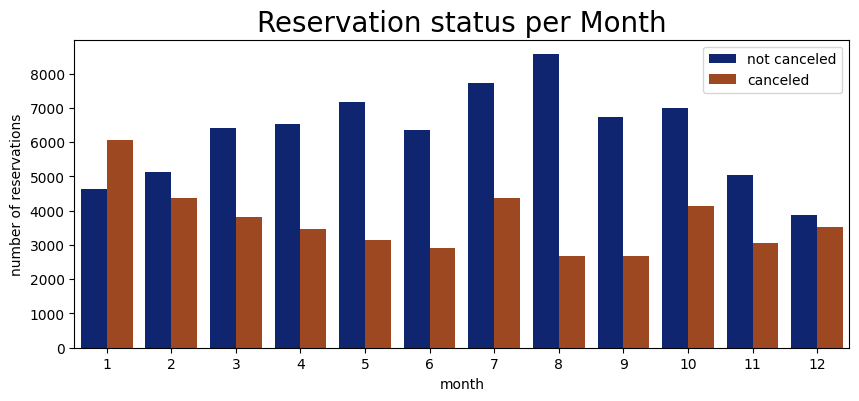

In [77]:
#extracting month from date column
dataset['month']=dataset['reservation_status_date'].dt.month
plt.figure(figsize=(10,4))
ax1 = sns.countplot(x= 'month', hue = 'is_canceled', data=dataset,palette='dark')
ax1.legend(title='Reservation Status', labels=['Not Canceled', 'Canceled'])
plt.title('Reservation status per Month', size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

*August has more reservations whereas January has highest cancelations*

*Now we will plot month wise ADR for only canceled bookings*

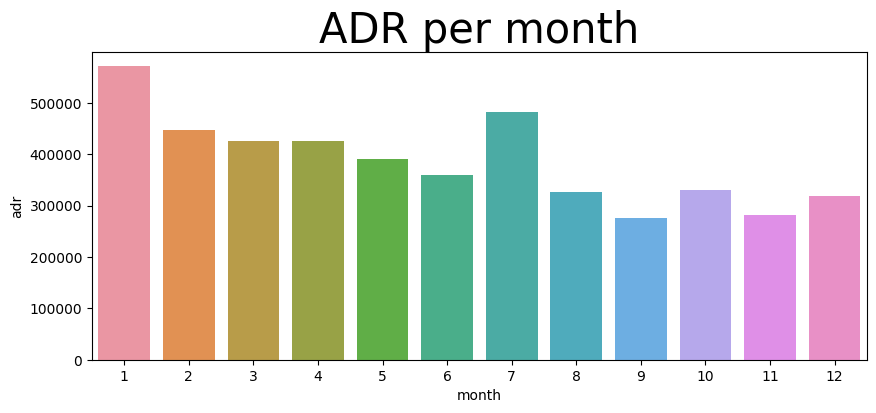

In [78]:
plt.figure(figsize=(10, 4))
plt.title('ADR per month', fontsize=30)
sns.barplot(x='month', y='adr', data=dataset[dataset['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

### *From both the graph we can see the when ADR is more cancelations are more i.e.January and wher ADR is less bookings are not canceled* 

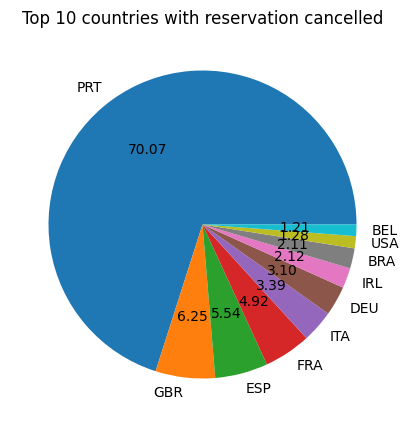

In [79]:
canceled_data=dataset[dataset['is_canceled']==1]
top_10_country= canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(5,5))
plt.title('Top 10 countries with reservation cancelled')
plt.pie(top_10_country,autopct = '%.2f',labels= top_10_country.index)
plt.show()

### *We can see that Portugal has highest contribution in cancellation of bookings*

*Checking which market segment bring more reservations*

In [80]:
dataset['market_segment'].value_counts(normalize='True')

market_segment
Online TA        0.473050
Offline TA/TO    0.202850
Groups           0.165937
Direct           0.105588
Corporate        0.044351
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

*Now we will see cancellations based on market segments*

In [81]:
canceled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.468964
Groups           0.273545
Offline TA/TO    0.187911
Direct           0.043733
Corporate        0.022432
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64

### *We can note here that though Online TA has most contribution in reservatins(47%) it also accounts for most canclelled reservations(~47%)*

In [82]:
cancelled_df_adr=canceled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

In [83]:
not_canceled_data=dataset[dataset['is_canceled']==0]
not_cancelled_df_adr=not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

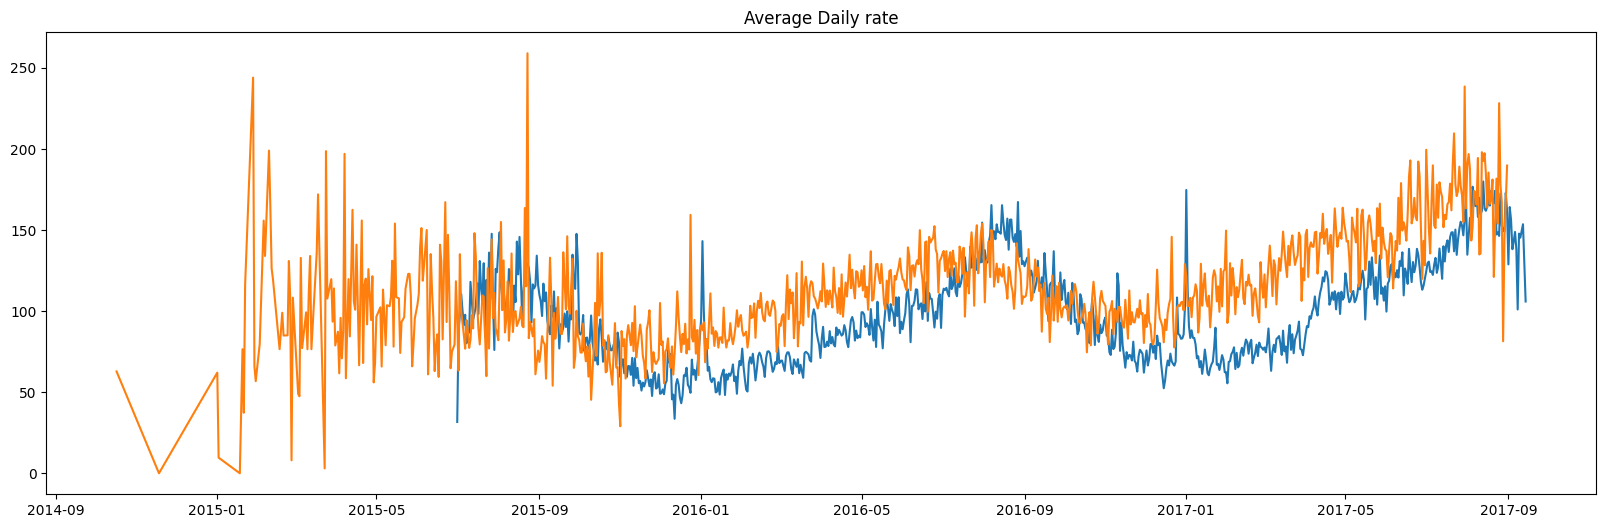

In [84]:
plt.figure(figsize=(20,6))
plt.title('Average Daily rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='NotCanceled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label='Canceled')
plt.show()

*filtering data for 2016 -2017*

In [87]:
not_cancelled_df_adr=not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017')]
cancelled_df_adr=cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017')] 

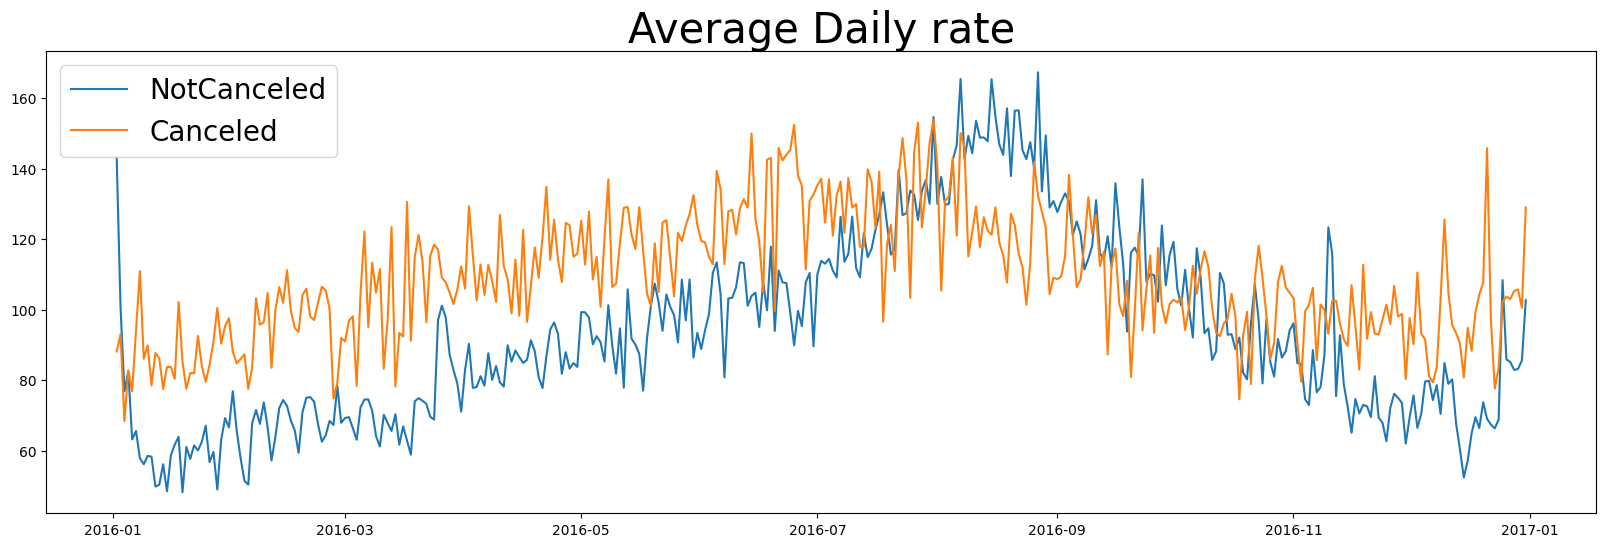

In [91]:
plt.figure(figsize=(20,6))
plt.title('Average Daily rate',fontsize=30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='NotCanceled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label='Canceled')
plt.legend(fontsize=20)
plt.show()

### *From above we can see that as ADR increases Canclellation also increased*